# 📘 Notebook 06: Data Split with Holdout and Cross-Validation

"""
Purpose:
Split the cleaned dataset into training, validation, and hold-out sets.
Add optional support for cross-validation for robust model evaluation.

Author: Fedor Zakharov
Date: May 20, 2025
"""

✅ No overlap between train and hold-out sets — all good!
✅ Split datasets successfully saved.
📊 Total: 151392 rows, Train: 121113 rows, Hold-out: 30279 rows
🔍 Overlapping rows between train and hold-out: 0 (should be 0)

📈 Descriptive statistics for Train set:
            Lwr        Int_Pnt          X_int          Y_int          X_fac  \
count  121113.0  121113.000000  121113.000000  121113.000000  121113.000000   
mean        1.0      18.761190       4.027858       3.097471      14.425726   
std         0.0      11.420076       2.566945       1.956046       8.082375   
min         1.0       1.000000       0.000000       0.000000       1.000000   
25%         1.0       9.000000       2.000000       2.000000       7.000000   
50%         1.0      17.000000       4.000000       3.000000      14.000000   
75%         1.0      29.000000       6.000000       5.000000      21.000000   
max         1.0      38.000000       8.000000       6.000000      28.000000   

               Y_fac       

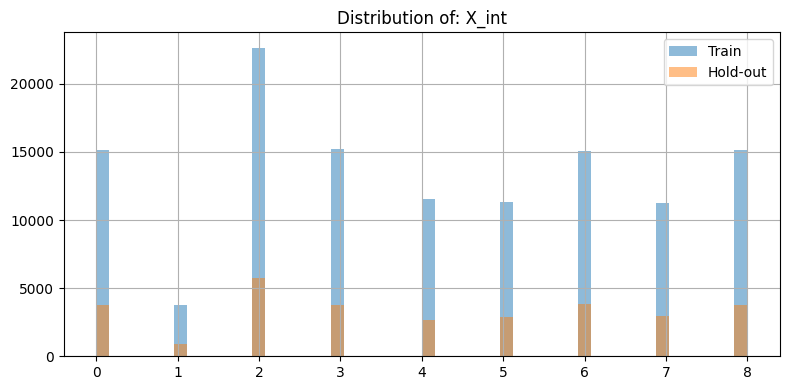

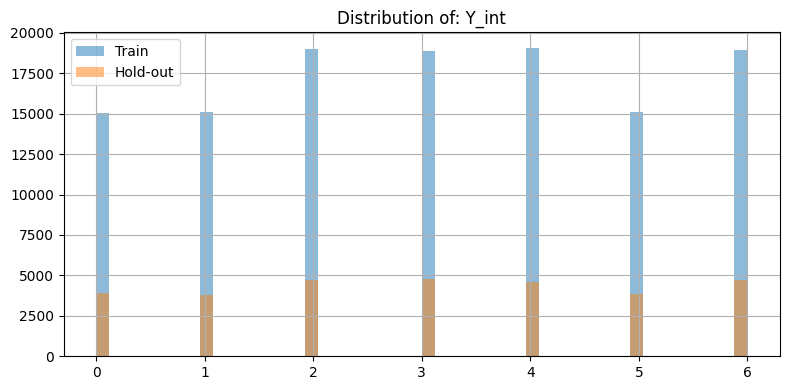

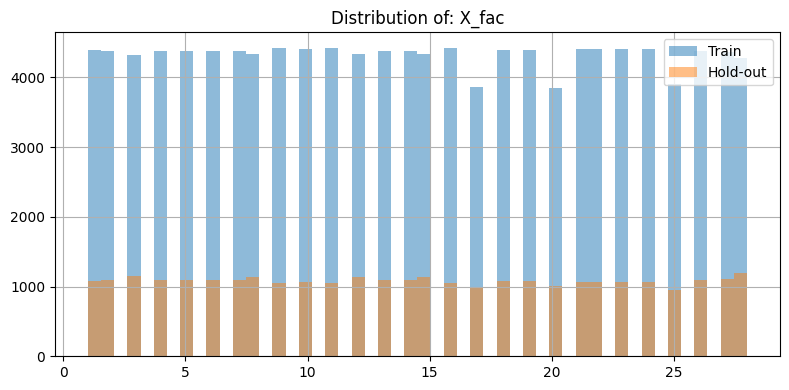

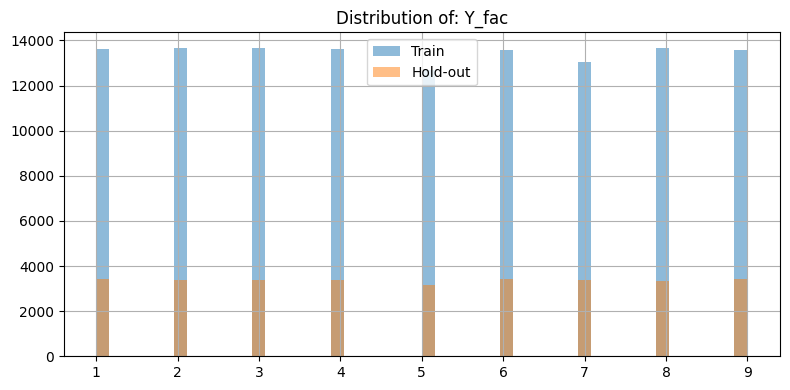

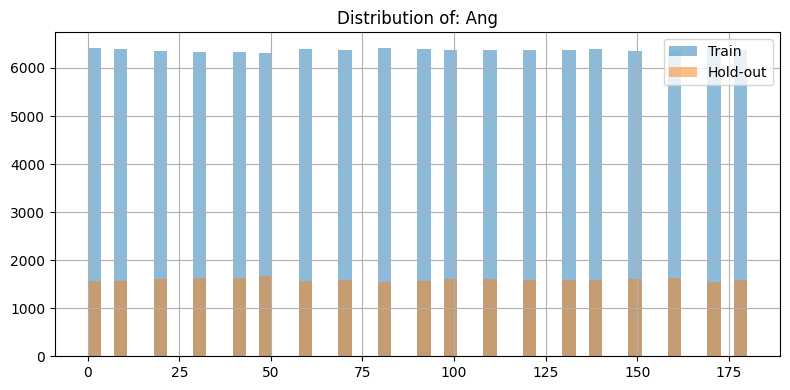

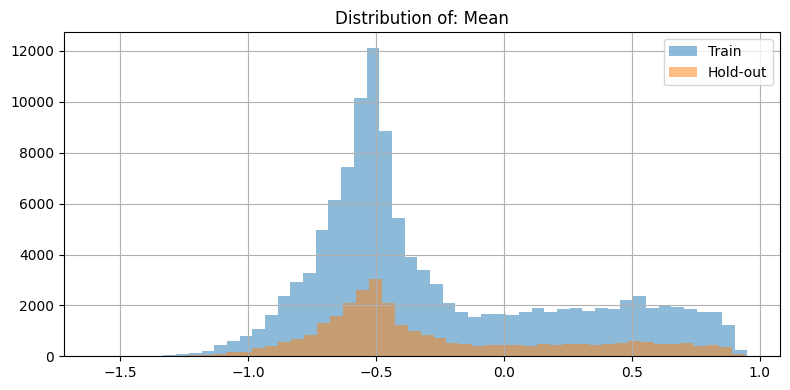


📊 Holdout vs Train Stats:
       Train Mean  Holdout Mean  Δ Mean  Train Std  Holdout Std   Δ Std
X_int      4.0279        4.0448 -0.0170     2.5669       2.5705 -0.0035
Y_int      3.0975        3.0789  0.0186     1.9560       1.9673 -0.0113
X_fac     14.4257       14.4256  0.0001     8.0824       8.1186 -0.0362
Y_fac      4.9891        5.0035 -0.0145     2.5942       2.5950 -0.0008
Ang       90.0348       89.8610  0.1738    54.7862      54.7180  0.0682
Mean      -0.2582       -0.2561 -0.0021     0.4979       0.4972  0.0007


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 📂 Path to the original dataset
file_path = '/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_Interference_Base.csv'

# 📥 Load the data
df = pd.read_csv(file_path)

# 🔀 Split into training and hold-out sets (80/20)
train_df, holdout_df = train_test_split(df, test_size=0.2, random_state=42)

# ✅ Check for overlap between train and hold-out sets
intersection = pd.merge(train_df, holdout_df, how='inner')
if len(intersection) == 0:
    print("✅ No overlap between train and hold-out sets — all good!")
else:
    print(f"⚠️ Found {len(intersection)} overlapping rows! Check the split logic.")

# 💾 Paths to save the new datasets
train_path = '/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_Train.csv'
holdout_path = '/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_HoldOut.csv'

# 💾 Save the split datasets
train_df.to_csv(train_path, index=False)
holdout_df.to_csv(holdout_path, index=False)

print("✅ Split datasets successfully saved.")

# 📊 Basic size check
print(f"📊 Total: {len(df)} rows, Train: {len(train_df)} rows, Hold-out: {len(holdout_df)} rows")

# 🔍 Redundant overlap check
intersection = pd.merge(train_df, holdout_df, how='inner')
print(f"🔍 Overlapping rows between train and hold-out: {len(intersection)} (should be 0)")

# 📈 Descriptive statistics
print("\n📈 Descriptive statistics for Train set:")
print(train_df.describe())
print("\n📈 Descriptive statistics for Hold-out set:")
print(holdout_df.describe())

# 📉 Plot distributions for key features
key_columns = ['X_int', 'Y_int', 'X_fac', 'Y_fac', 'Ang', 'Mean']

for col in key_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(train_df[col], bins=50, alpha=0.5, label='Train')
    plt.hist(holdout_df[col], bins=50, alpha=0.5, label='Hold-out')
    plt.title(f'Distribution of: {col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📋 Summary table: Mean and Std comparison
numeric_columns = key_columns
train_mean = train_df[numeric_columns].mean()
holdout_mean = holdout_df[numeric_columns].mean()
train_std = train_df[numeric_columns].std()
holdout_std = holdout_df[numeric_columns].std()

comparison_df = pd.DataFrame({
    'Train Mean': train_mean,
    'Holdout Mean': holdout_mean,
    'Δ Mean': train_mean - holdout_mean,
    'Train Std': train_std,
    'Holdout Std': holdout_std,
    'Δ Std': train_std - holdout_std
})

# 📊 Display summary as a table
print("\n📊 Holdout vs Train Stats:")
print(comparison_df.round(4))  # округляем для удобства
